### Exploratory analysis 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [14]:
import seaborn as sns

In [8]:
%matplotlib inline

In [33]:
data1 = pd.read_csv("ml_case_training_data.csv")

In [15]:
data1.iloc[1:5,:]

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
id                          16096 non-null object
activity_new                6551 non-null object
campaign_disc_ele           0 non-null float64
channel_sales               11878 non-null object
cons_12m                    16096 non-null int64
cons_gas_12m                16096 non-null int64
cons_last_month             16096 non-null int64
date_activ                  16096 non-null object
date_end                    16094 non-null object
date_first_activ            3508 non-null object
date_modif_prod             15939 non-null object
date_renewal                16056 non-null object
forecast_base_bill_ele      3508 non-null float64
forecast_base_bill_year     3508 non-null float64
forecast_bill_12m           3508 non-null float64
forecast_cons               3508 non-null float64
forecast_cons_12m           16096 non-null float64
forecast_cons_year          16096 non-null int64

In [21]:
##extract non-continuous var
l=[]
for i in data1.columns:
    if i not in data1.describe().columns:
        l.append(i)

* show the non-numerical variables

In [22]:
l

['id',
 'activity_new',
 'channel_sales',
 'date_activ',
 'date_end',
 'date_first_activ',
 'date_modif_prod',
 'date_renewal',
 'has_gas',
 'origin_up']

In [24]:
data1.set_index('cons_12m',inplace=True)

In [27]:
data1.index

Int64Index([309275,      0,   4660,    544,   1584, 121335,   4425,   8302,
             45097,  29552,
            ...
              1097,   8310,   9441,  18163,  87146,  32270,   7223,   1844,
               131,   8730],
           dtype='int64', name='cons_12m', length=16096)

C:\Users\Yilun\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Yilun\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Yilun\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


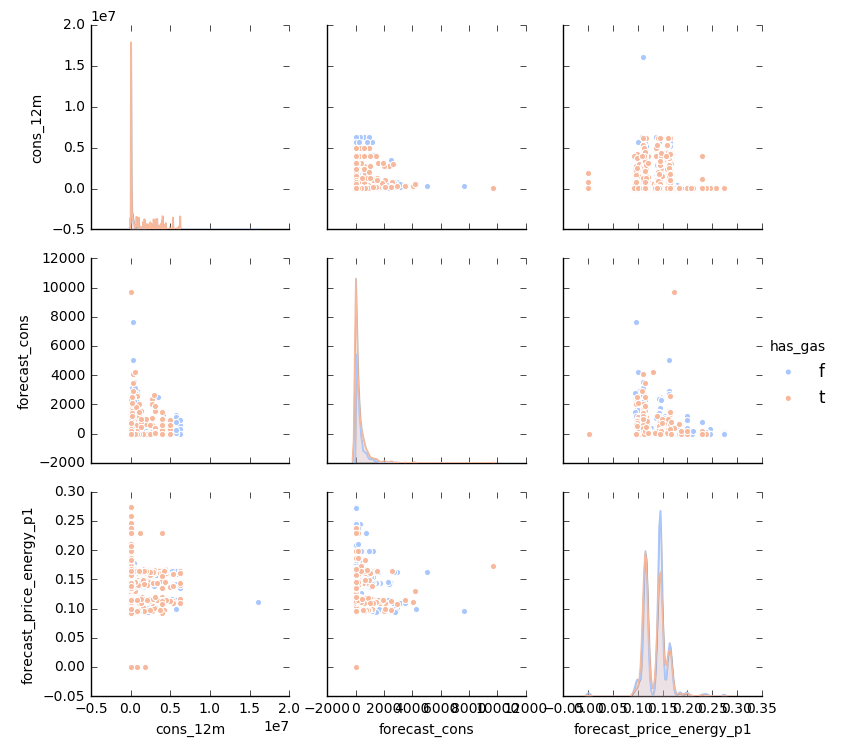

In [35]:
sns.pairplot(data1[['cons_12m','forecast_cons','forecast_price_energy_p1','has_gas']],
             hue='has_gas',palette='coolwarm')

* customers has gas have higher consumption

In [12]:
data1['date_activ']=pd.to_datetime(data1['date_activ'])

In [30]:
data1[['cons_12m','forecast_cons']].corr()

,cons_12m,forecast_cons
cons_12m,1.000000,0.133147
forecast_cons,0.133147,1.000000


* current consumption is weakly correlated with forcasted consumption

* Use LabelEncoder to convert origination channel to dummy

In [2]:
from sklearn.preprocessing import LabelEncoder
data1['origin_up']=LabelEncoder().fit_transform(data1['origin_up'])

* visualize the correlation between current and forcasted consumption

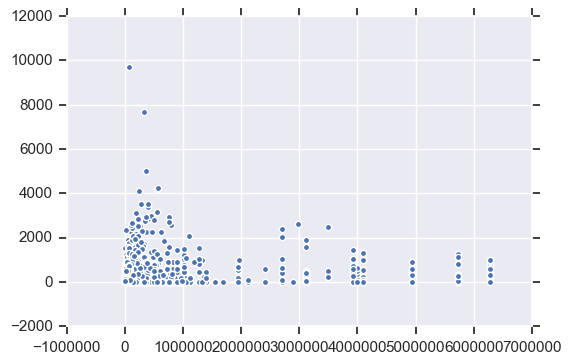

In [49]:
plt.scatter(data1['cons_12m'],data1['forecast_cons'])

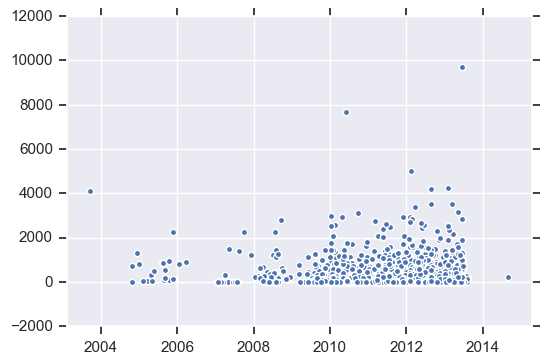

In [50]:
plt.scatter(data1['date_activ'],data1['forecast_cons'])

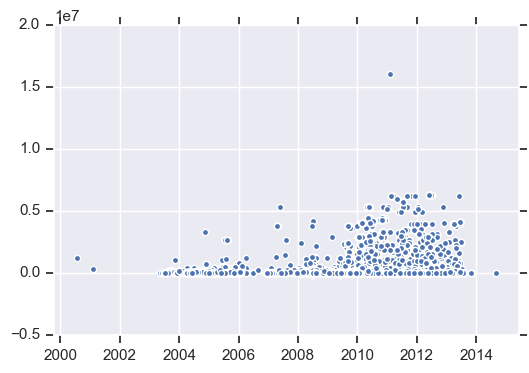

In [51]:
plt.scatter(data1['date_activ'],data1['cons_12m'])

### ** plot based on time ** ###

In [13]:
data1[['date_activ','forecast_cons']].corr()

,forecast_cons
forecast_cons,1.0


In [4]:
# count number of customers by counting unique ids
customers = data1['id'].value_counts()
num_unq_customers = len(customers)
print(num_unq_customers)

16096


In [5]:
# Since length of dataframe = length of unique customers, 
# we can infer that each customer id exists only once
# in the dataframe. We can check this further by getting 
# the max of customers, which has the counts of each id.
# If max(customers) = 1, we have ascertained that each 
# customer has one entry in the dataset.

print(max(customers))

1


In [37]:
data1["total_cons_12m"]=data1["cons_12m"]+data1["cons_gas_12m"]
total_cons_12m = data1["total_cons_12m"]
elc_cons_12m = data1["cons_12m"]
gas_cons_12m = data1["cons_gas_12m"]
sub_power = data1["pow_max"]
forecast_cons_12m = data1['forecast_cons_12m']
date_activated=pd.to_datetime(data1['date_activ'])


In [38]:
log_curr_cons=np.log(elc_cons_12m)
log_fore_cons=np.log(forecast_cons_12m)

cons_df=pd.DataFrame(
    {'date_activated':date_activated,
     'total_curr_cons':log_curr_cons,
     'total_fore_cons':log_fore_cons})
cons_df.sort_values('date_activated',inplace=True)

C:\Users\Yilun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\Yilun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
C:\Users\Yilun\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\Users\Yilun\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


C:\Users\Yilun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\Yilun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
C:\Users\Yilun\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\Users\Yilun\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


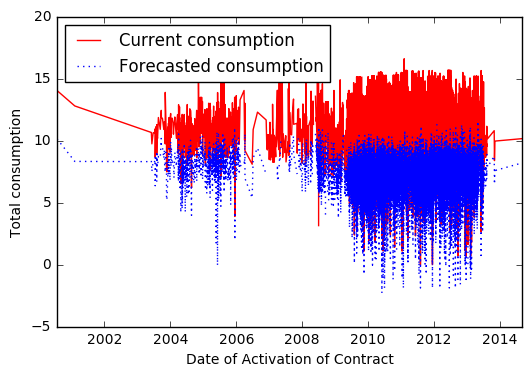

In [40]:
log_curr_cons=np.log(elc_cons_12m)
log_fore_cons=np.log(forecast_cons_12m)

cons_df=pd.DataFrame(
    {'date_activated':date_activated,
     'total_curr_cons':log_curr_cons,
     'total_fore_cons':log_fore_cons})
cons_df.sort_values('date_activated',inplace=True)

plt.plot(cons_df['date_activated'],cons_df['total_curr_cons'],c='r')
plt.plot(cons_df['date_activated'],cons_df['total_fore_cons'],c='b',linestyle=':')
plt.legend(['Current consumption','Forecasted consumption'],loc='upper left')
plt.xlabel('Date of Activation of Contract')
plt.ylabel('Total consumption')
plt.show()

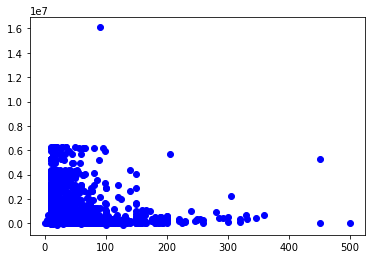

The pearson correlation is 0.10242255835
The kendall correlation is 0.282451956033


In [8]:
# Correlation between subscribed power and total consumption using two different correlation methods

plt.scatter(sub_power,elc_cons_12m,c="blue")
plt.show()

# plt.show(pd.scatter_matrix(corr_data,figsize=(10,10),diagonal="hist"))

# Pearson correlation
pearson_corr=elc_cons_12m.corr(sub_power,method='pearson')
print("The pearson correlation is", pearson_corr)

# Kendall correlation 
kendall_corr=elc_cons_12m.corr(sub_power,method='kendall')
print("The kendall correlation is", kendall_corr)

# This implies that there is a weak positive correlation between the electricity consumption and subscribed power

C:\Users\Yilun\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


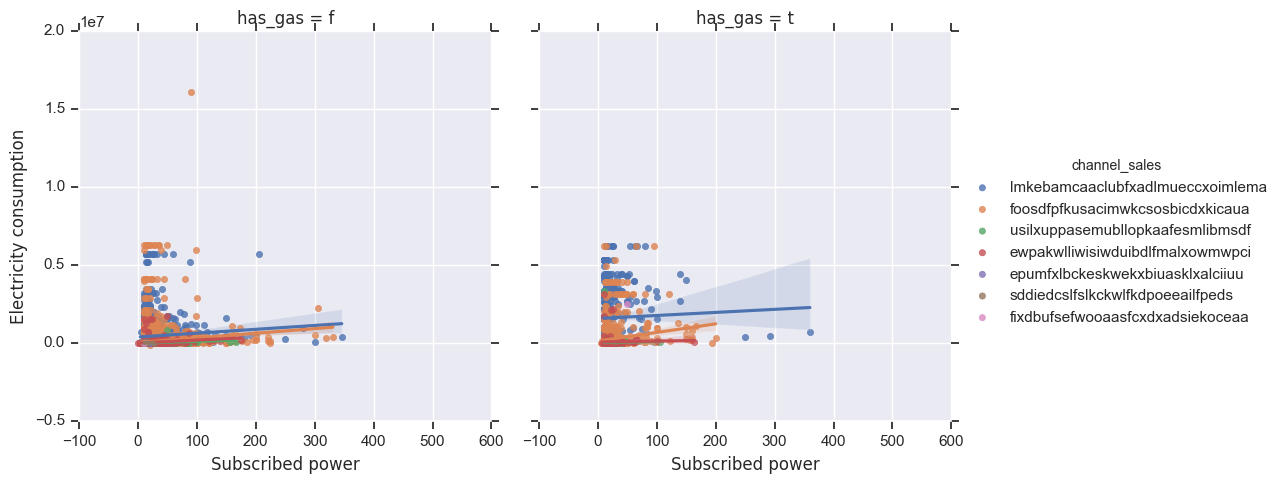

In [42]:
# We can visualize the correlation between the electricity
# consumption and subscribed power separately for customers
# that also have subscriptions for gas and mark them 
# separately by sales channels and the code of the electricity
# campaign the custmoer first subscribed to.

import seaborn as sns
sns.set()

g = sns.lmplot(x="pow_max", y="cons_12m",hue='channel_sales',col='has_gas',scatter=True,
               truncate=True, height=5, data=data1)

plt.show(g.set_axis_labels("Subscribed power", "Electricity consumption"))

# Scatter plot with different markers for different sales channels 

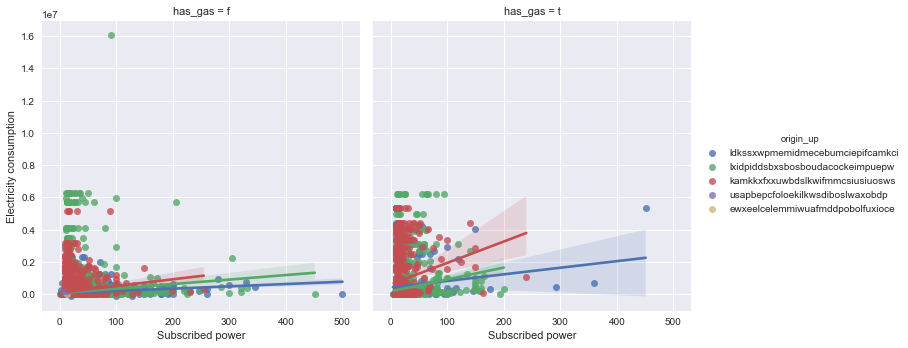

In [10]:
g = sns.lmplot(x="pow_max", y="cons_12m",hue='origin_up',col='has_gas',scatter=True,
               truncate=True, size=5, data=data1)

plt.show(g.set_axis_labels("Subscribed power", "Electricity consumption"))

# Scatter plot with different markers for different electricity campaigns